### farshidhesami@gmail.com

### implementation process of a machine learning model :

- 1. **Data Collection:** Gather relevant data for the problem you are trying to solve.

- 2. **Exploratory Data Analysis (EDA):** Explore and analyze the data to gain insights, understand the underlying patterns, and identify any issues or anomalies. This step involves tasks such as visualizations, statistical summaries, and correlation analysis.

- 3. **Data Cleaning:** Handle missing values, outliers, duplicate records, and other data quality issues. This may include imputing missing values, removing outliers, and resolving inconsistencies in the data.

- 4. **Data Preprocessing:** Perform further preprocessing steps such as feature scaling, normalization, encoding categorical variables, and handling skewed distributions. These steps prepare the data for training the machine learning model.

- 5. **Feature Selection/Engineering:** Select the most relevant features or create new features that can enhance the model's performance. This can be done based on domain knowledge, feature importance analysis, or dimensionality reduction techniques.

- 6. **Train/Test Split:** Split the dataset into training and testing subsets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.

- 7. **Model Selection:** Choose an appropriate model or algorithm based on the problem type and requirements. Consider factors such as the nature of the data, interpretability, and performance.

- 8. **Model Training:** Train the selected model using the training data. This involves fitting the model to the data and adjusting its internal parameters.

- 9. **Model Evaluation:** Evaluate the trained model's performance on the testing data using suitable evaluation metrics. Common metrics include accuracy, precision, recall, F1 score, mean squared error, and R-squared.

- 10. **Model Tuning:** Fine-tune the model's hyperparameters to optimize its performance. This can be done using techniques like grid search, random search, or Bayesian optimization.

- 11. **Model Validation:** Validate the tuned model using additional evaluation techniques such as cross-validation to ensure its generalizability and robustness.

- 12. **Model Deployment:** Deploy the trained model to make predictions on new, unseen data. This could involve integrating the model into a larger system or creating an API for model access.

- 13. **Model Monitoring and Maintenance:** Continuously monitor the model's performance in production and update it as needed to account for changes in the data or improve its performance.





In [73]:
# Load the dataset
pd.read_csv('FuelConsumption2023.csv', encoding='latin-1')

df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
        'CO2EMISSIONS']]

# Examine dataset dimensions
print("Dataset dimensions:", df.shape)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Display the data types of each column
print("\nData types:")
print(df.dtypes)

# Count the number of missing values in each column
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics of numerical columns
print("\nSummary statistics:")
print(df.describe())

# Unique values in categorical columns
print("\nUnique values in categorical columns:")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables (if any)
# Example: One-hot encoding
df = pd.get_dummies(df)

# Perform feature scaling or normalization (if required)
# Example: Min-max scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print column names to check for the correct column name
print(df_scaled.columns)

Dataset dimensions: (821, 735)

First few rows of the dataset:
   MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY   
0       2023         1.5          4                   7.9  \
1       2023         1.5          4                   8.1   
2       2023         1.5          4                   8.9   
3       2023         3.5          6                  12.6   
4       2023         3.0          6                  13.8   

   FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG   
0                  6.3                   7.2                        39  \
1                  6.5                   7.4                        38   
2                  6.5                   7.8                        36   
3                  9.4                  11.2                        25   
4                 11.2                  12.4                        23   

   CO2EMISSIONS  CO2_RATING  SMOG_RATING  ...  TRANSMISSION_AV6   
0           167           6            7  ...             

In [74]:
df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
        'CO2EMISSIONS']]

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,1.5,4,7.9,6.3,7.2,167
1,1.5,4,8.1,6.5,7.4,172
2,1.5,4,8.9,6.5,7.8,181
3,3.5,6,12.6,9.4,11.2,263
4,3.0,6,13.8,11.2,12.4,291
...,...,...,...,...,...,...
816,2.0,4,10.2,7.9,9.2,215
817,2.0,4,10.3,8.2,9.4,218
818,2.0,4,11.1,8.7,10.0,233
819,2.0,4,10.5,8.4,9.6,223


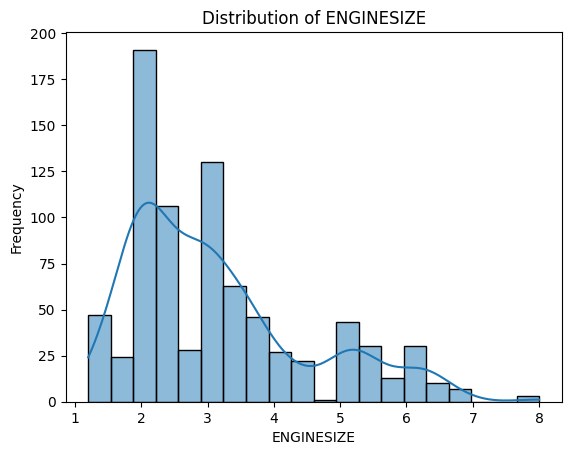

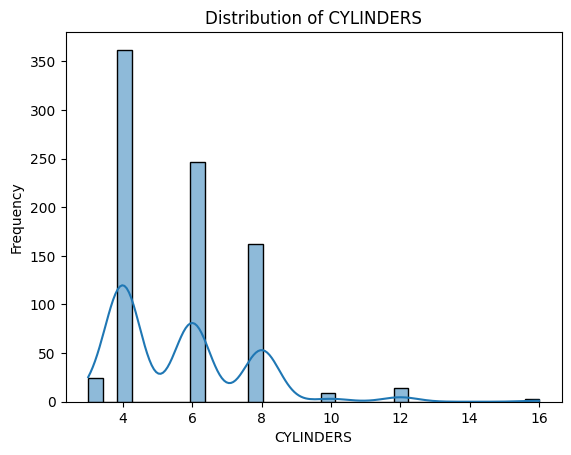

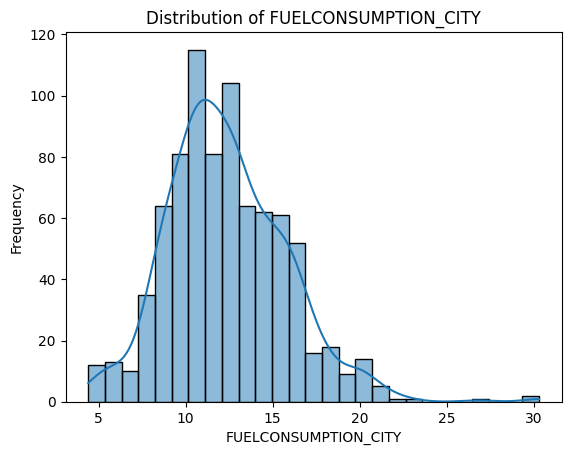

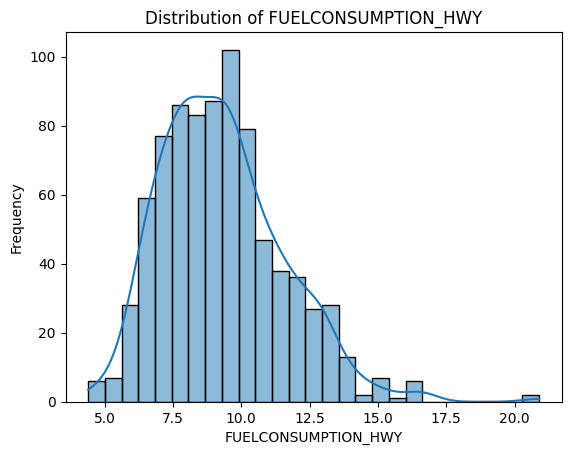

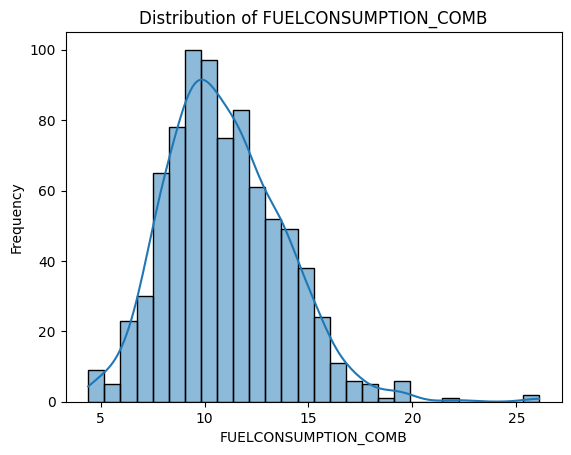

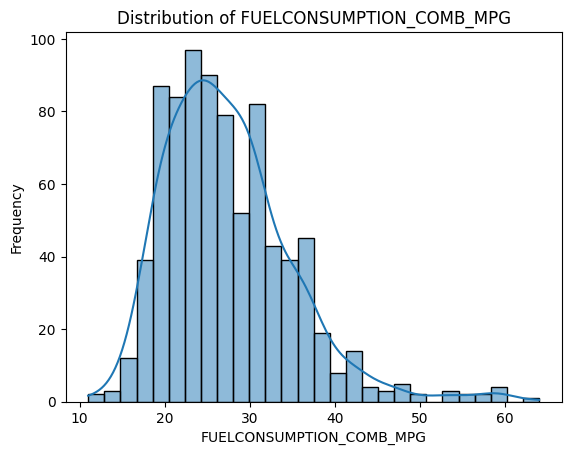

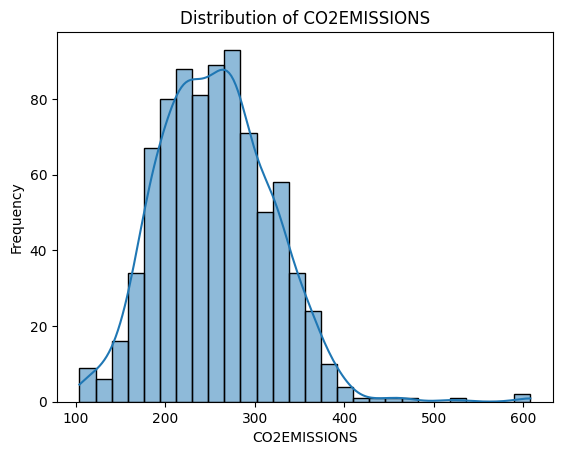

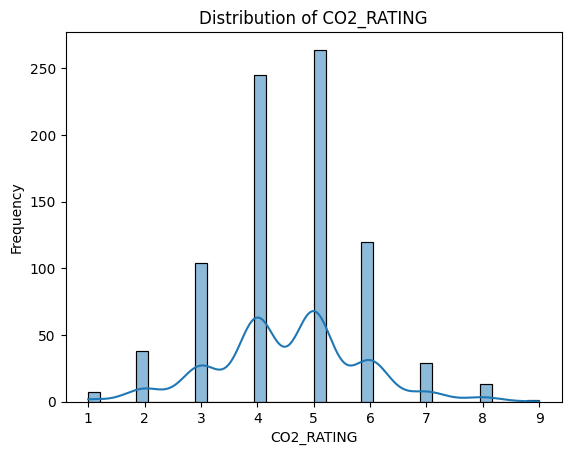

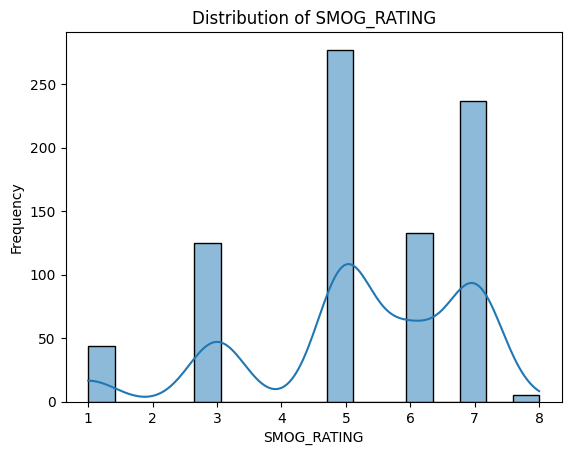

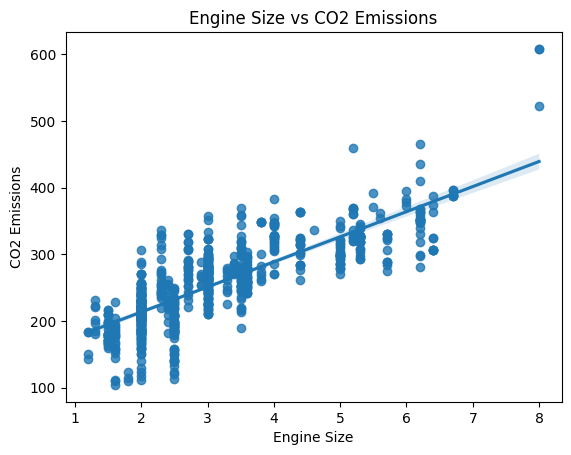

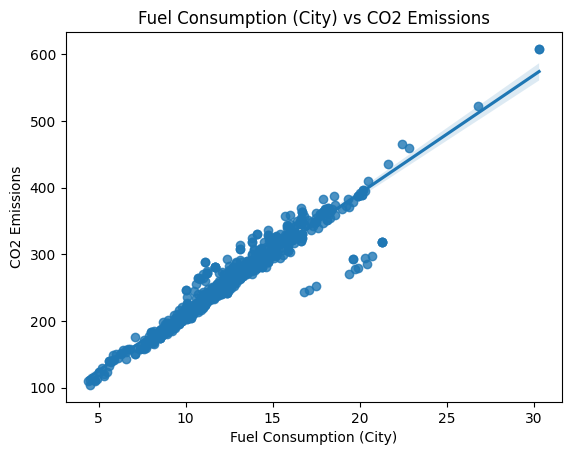

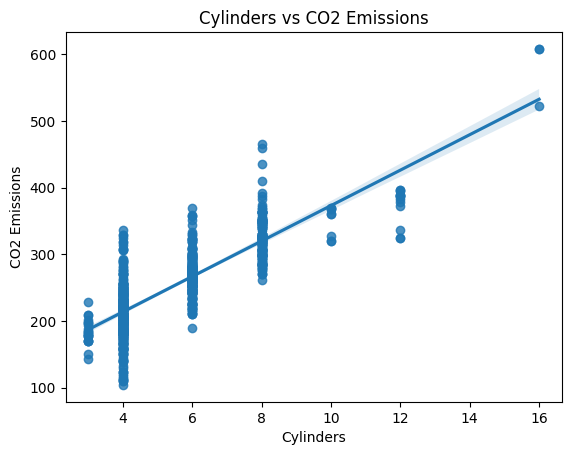

In [75]:
# Visualize the distribution of numeric columns using histograms and KDE plots
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns = numeric_columns.drop("MODELYEAR")  # Remove MODELYEAR from the list
for column in numeric_columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")
    plt.show()

# Visualize the relationships between variables using scatter plots with regression lines
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df)
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Engine Size vs CO2 Emissions")
plt.show()

sns.regplot(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=df)
plt.xlabel("Fuel Consumption (City)")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption (City) vs CO2 Emissions")
plt.show()

sns.regplot(x="CYLINDERS", y="CO2EMISSIONS", data=df)
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.title("Cylinders vs CO2 Emissions")
plt.show()

Linear Regression MSE: 0.001236137922079487
Linear Regression R-squared: 0.9073133361860126


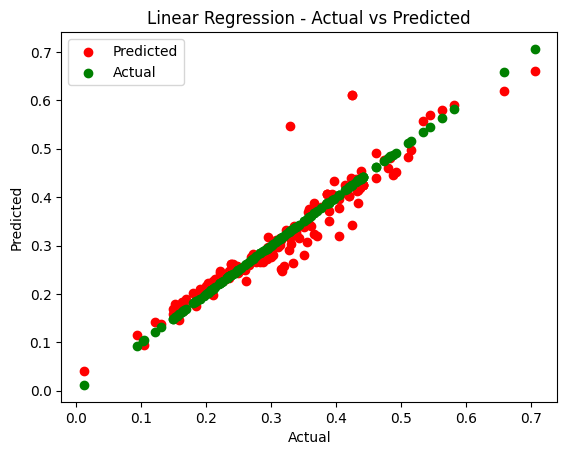

Support Vector Regression MSE: 0.00202689223226129
Support Vector Regression R-squared: 0.8480219111773967


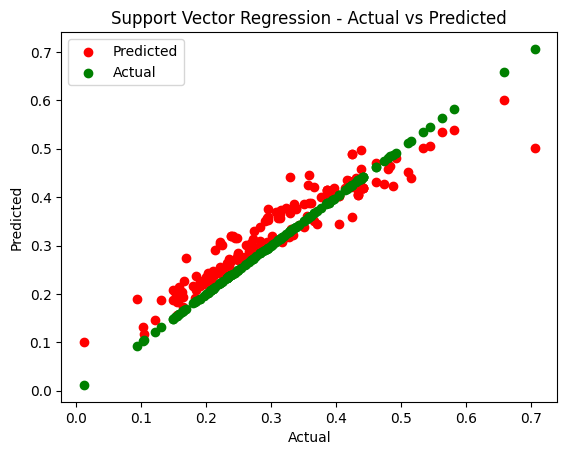

Multilayer Perceptron MSE: 0.0026369995060017367
Multilayer Perceptron R-squared: 0.8022755532980751


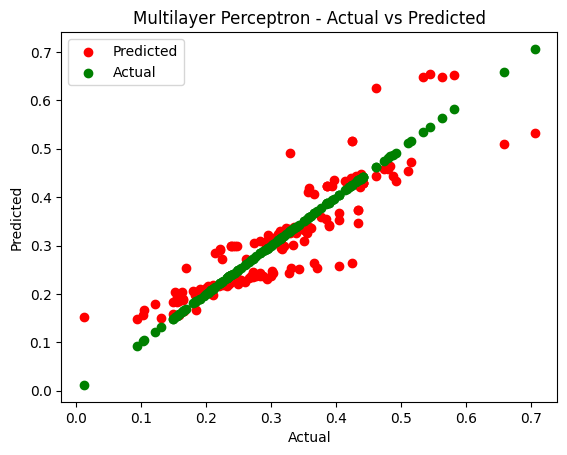

Decision Tree MSE: 0.0004593676299569966
Decision Tree R-squared: 0.9655562277280298


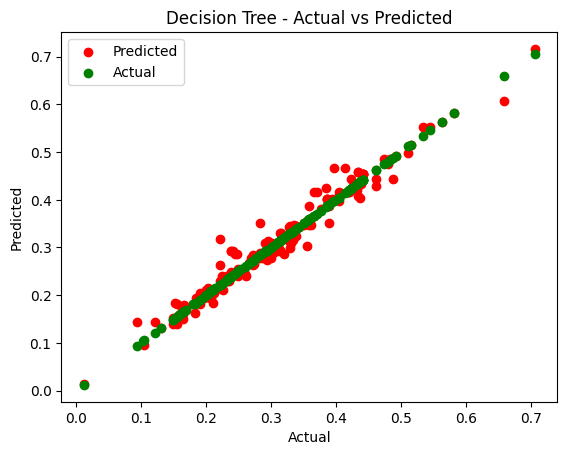

Random Forest MSE: 0.0005186119890407212
Random Forest R-squared: 0.9611140357240576


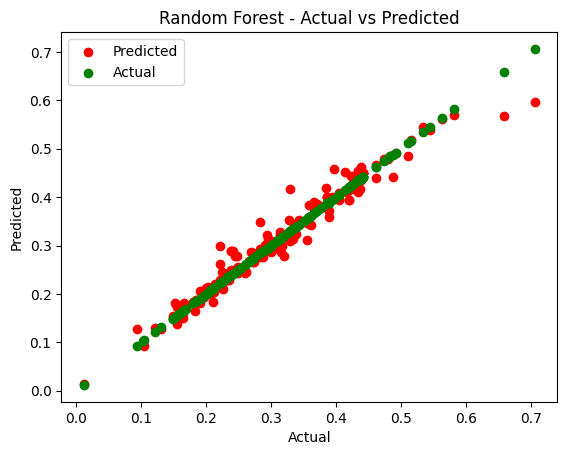

Gradient Boosting MSE: 0.0005706106245510999
Gradient Boosting R-squared: 0.9572151341838242


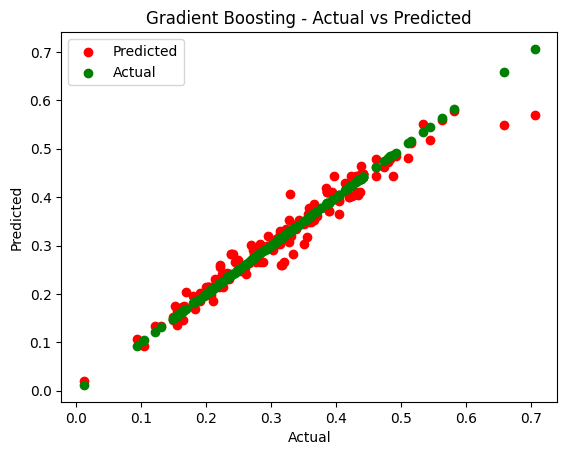

K-Nearest Neighbors MSE: 0.0011560588882017447
K-Nearest Neighbors R-squared: 0.9133177296756073


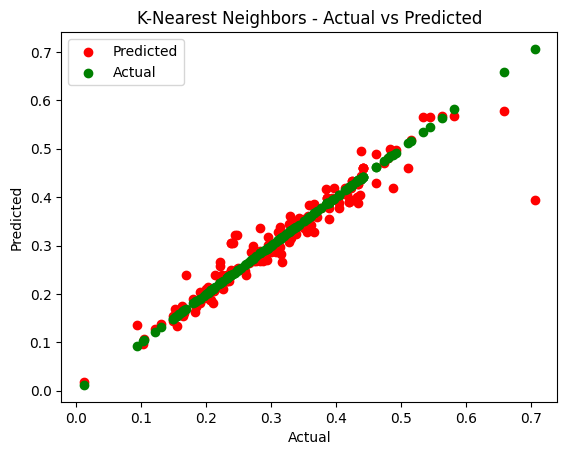

Tuned Linear Regression MSE: 0.001236137922079487
Tuned Linear Regression R-squared: 0.9073133361860126


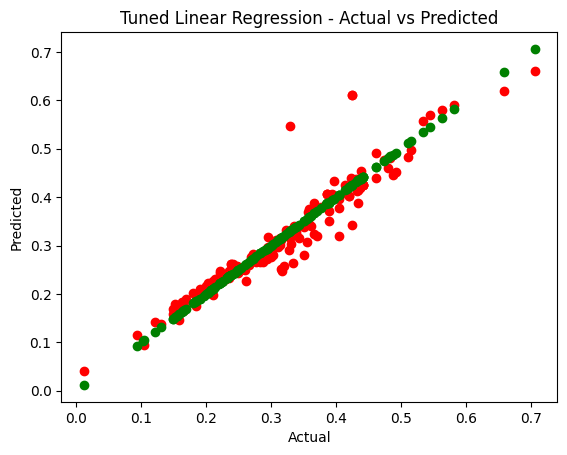

Tuned Support Vector Regression MSE: 0.001102549653675977
Tuned Support Vector Regression R-squared: 0.9173298972038799


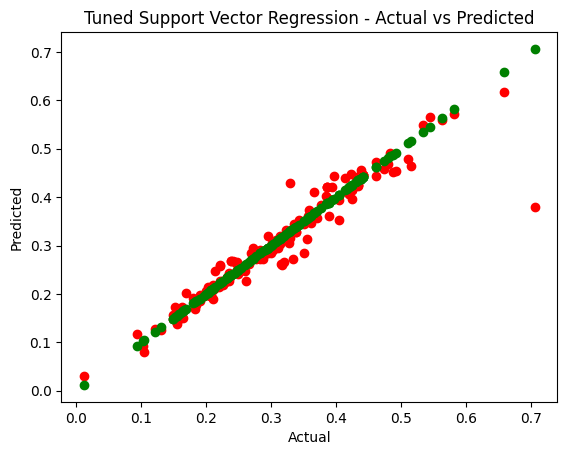

Tuned Multilayer Perceptron MSE: 0.0019657827468501795
Tuned Multilayer Perceptron R-squared: 0.8526039519262292


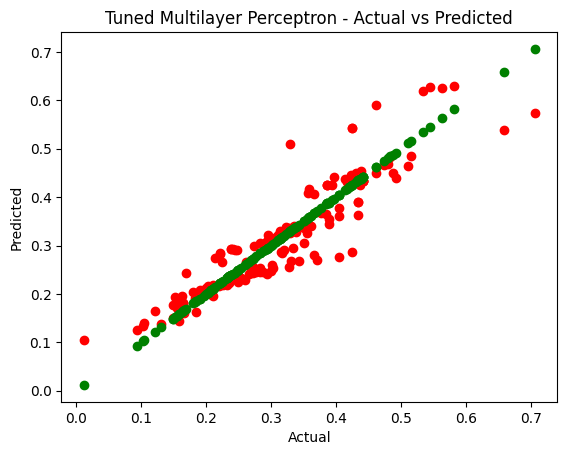

Tuned Decision Tree MSE: 0.0006809427588706394
Tuned Decision Tree R-squared: 0.9489423377111202


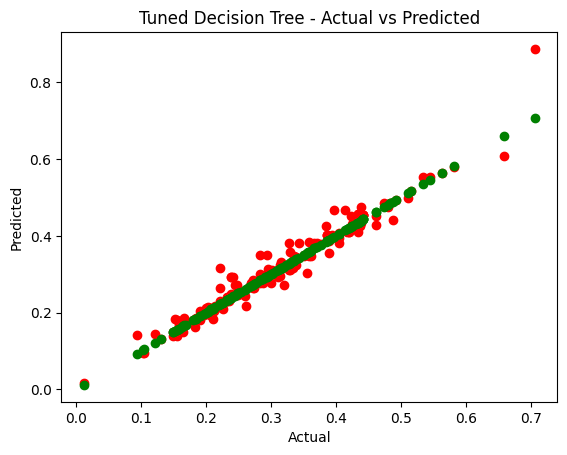

Tuned Random Forest MSE: 0.00048072140969996203
Tuned Random Forest R-squared: 0.9639551033155819


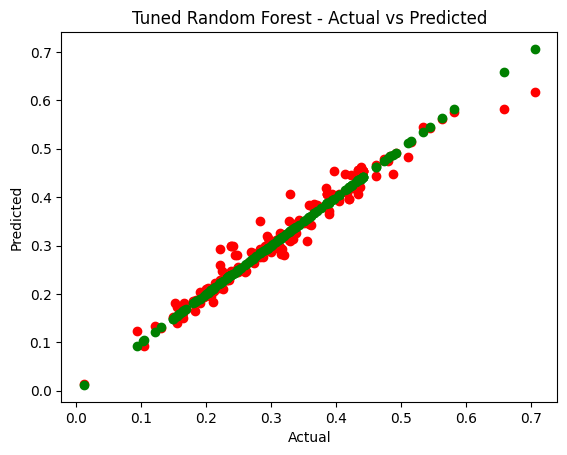

Tuned K-Nearest Neighbor MSE: 0.0011157135255423325
Tuned K-Nearest Neighbor R-squared: 0.916342858990446


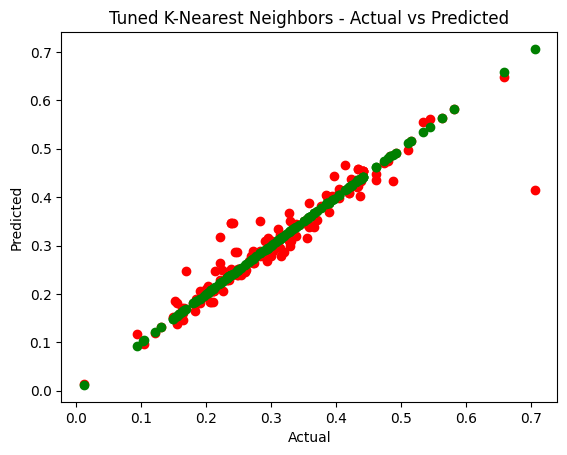

Tuned Gradient Boosting MSE: 0.0005742602851535142
Tuned Gradient Boosting R-squared: 0.9569414795541514


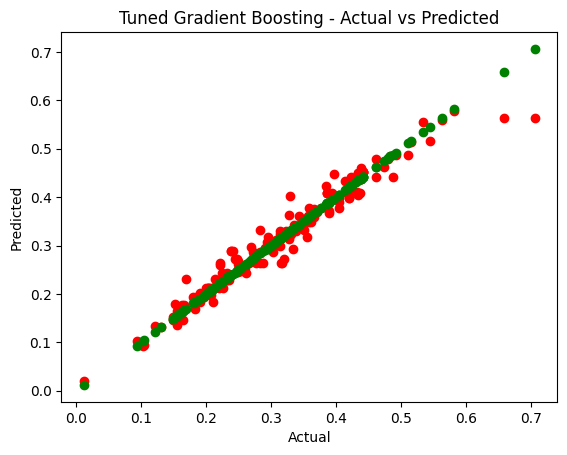

Model: LinearRegression
Cross-validated R-squared scores: [0.98287787 0.54786272 0.89588417 0.96915501 0.97288009]
Mean R-squared: 0.8737319733779648

Model: SVR
Cross-validated R-squared scores: [0.57997223 0.70716659 0.88101149 0.80113308 0.86984639]
Mean R-squared: 0.7678259545797379

Model: MLPRegressor
Cross-validated R-squared scores: [0.87257894 0.39477004 0.89696072 0.83084842 0.9430421 ]
Mean R-squared: 0.787640046333682

Model: DecisionTreeRegressor
Cross-validated R-squared scores: [0.88469644 0.79230186 0.92832232 0.94831299 0.97934933]
Mean R-squared: 0.9065965875278706

Model: RandomForestRegressor
Cross-validated R-squared scores: [0.88072223 0.77689736 0.95715257 0.95762856 0.9849354 ]
Mean R-squared: 0.911467223212278

Model: GradientBoostingRegressor
Cross-validated R-squared scores: [0.92168803 0.73632663 0.94782108 0.96097364 0.98623823]
Mean R-squared: 0.910609521621731

Model: KNeighborsRegressor
Cross-validated R-squared scores: [0.79158258 0.70418145 0.94339052 

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('FuelConsumption2023.csv', encoding='latin-1')

# Data preprocessing

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables (if any)
# Example: One-hot encoding
df = pd.get_dummies(df)

# Perform feature scaling or normalization (if required)
# Example: Min-max scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Selecting Features
selected_features = [ "ENGINESIZE", "FUELCONSUMPTION_CITY", "CYLINDERS"]
X = df_scaled[selected_features]
y = df_scaled["CO2EMISSIONS"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training and evaluation

# Linear Regression (LR)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression MSE:", lr_mse)
print("Linear Regression R-squared:", lr_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, lr_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()



# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print("Support Vector Regression MSE:", svr_mse)
print("Support Vector Regression R-squared:", svr_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, svr_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regression - Actual vs Predicted')
plt.legend()
plt.show()

# Multilayer Perceptron (MLP)
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)
print("Multilayer Perceptron MSE:", mlp_mse)
print("Multilayer Perceptron R-squared:", mlp_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, mlp_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multilayer Perceptron - Actual vs Predicted')
plt.legend()
plt.show()

# Decision Tree (Regression)
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
decision_tree_predictions = decision_tree_regressor.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print("Decision Tree MSE:", decision_tree_mse)
print("Decision Tree R-squared:", decision_tree_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, decision_tree_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree - Actual vs Predicted')
plt.legend()
plt.show()

# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print("Random Forest MSE:", random_forest_mse)
print("Random Forest R-squared:", random_forest_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, random_forest_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest - Actual vs Predicted')
plt.legend()
plt.show()

# Gradient Boosting (GB)
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting MSE:", gradient_boosting_mse)
print("Gradient Boosting R-squared:", gradient_boosting_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, gradient_boosting_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting - Actual vs Predicted')
plt.legend()
plt.show()

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
print("K-Nearest Neighbors MSE:", knn_mse)
print("K-Nearest Neighbors R-squared:", knn_r2)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, knn_predictions, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='green', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('K-Nearest Neighbors - Actual vs Predicted')
plt.legend()
plt.show()


# Model Tuning

# Define the hyperparameter grid for each model
lr_param_grid = {'fit_intercept': [True, False]}
svr_param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh']}
dt_param_grid = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
gb_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1]}

# Perform grid search for each model
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5)
svr_grid_search.fit(X_train, y_train)

mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5)
mlp_grid_search.fit(X_train, y_train)

dt_grid_search = GridSearchCV(decision_tree_regressor, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(random_forest_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

gb_grid_search = GridSearchCV(gradient_boosting_model, gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)

# Evaluate the tuned models

lr_predictions_tuned = lr_grid_search.predict(X_test)
lr_mse_tuned = mean_squared_error(y_test, lr_predictions_tuned)
lr_r2_tuned = r2_score(y_test, lr_predictions_tuned)
print("Tuned Linear Regression MSE:", lr_mse_tuned)
print("Tuned Linear Regression R-squared:", lr_r2_tuned)

plt.scatter(y_test, lr_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Linear Regression - Actual vs Predicted')
plt.show()

svr_predictions_tuned = svr_grid_search.predict(X_test)
svr_mse_tuned = mean_squared_error(y_test, svr_predictions_tuned)
svr_r2_tuned = r2_score(y_test, svr_predictions_tuned)
print("Tuned Support Vector Regression MSE:", svr_mse_tuned)
print("Tuned Support Vector Regression R-squared:", svr_r2_tuned)

plt.scatter(y_test, svr_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Support Vector Regression - Actual vs Predicted')
plt.show()

mlp_predictions_tuned = mlp_grid_search.predict(X_test)
mlp_mse_tuned = mean_squared_error(y_test, mlp_predictions_tuned)
mlp_r2_tuned = r2_score(y_test, mlp_predictions_tuned)
print("Tuned Multilayer Perceptron MSE:", mlp_mse_tuned)
print("Tuned Multilayer Perceptron R-squared:", mlp_r2_tuned)

plt.scatter(y_test, mlp_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Multilayer Perceptron - Actual vs Predicted')
plt.show()

dt_predictions_tuned = dt_grid_search.predict(X_test)
dt_mse_tuned = mean_squared_error(y_test, dt_predictions_tuned)
dt_r2_tuned = r2_score(y_test, dt_predictions_tuned)
print("Tuned Decision Tree MSE:", dt_mse_tuned)
print("Tuned Decision Tree R-squared:", dt_r2_tuned)

plt.scatter(y_test, dt_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Decision Tree - Actual vs Predicted')
plt.show()

rf_predictions_tuned = rf_grid_search.predict(X_test)
rf_mse_tuned = mean_squared_error(y_test, rf_predictions_tuned)
rf_r2_tuned = r2_score(y_test, rf_predictions_tuned)
print("Tuned Random Forest MSE:", rf_mse_tuned)
print("Tuned Random Forest R-squared:", rf_r2_tuned)

plt.scatter(y_test, rf_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Random Forest - Actual vs Predicted')
plt.show()

knn_predictions_tuned = knn_grid_search.predict(X_test)
knn_mse_tuned = mean_squared_error(y_test, knn_predictions_tuned)
knn_r2_tuned = r2_score(y_test, knn_predictions_tuned)
print("Tuned K-Nearest Neighbor MSE:", knn_mse_tuned)
print("Tuned K-Nearest Neighbor R-squared:", knn_r2_tuned)

plt.scatter(y_test, knn_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned K-Nearest Neighbors - Actual vs Predicted')
plt.show()

gb_predictions_tuned = gb_grid_search.predict(X_test)
gb_mse_tuned = mean_squared_error(y_test, gb_predictions_tuned)
gb_r2_tuned = r2_score(y_test, gb_predictions_tuned)
print("Tuned Gradient Boosting MSE:", gb_mse_tuned)
print("Tuned Gradient Boosting R-squared:", gb_r2_tuned)

plt.scatter(y_test, gb_predictions_tuned, c='red')
plt.scatter(y_test, y_test, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Tuned Gradient Boosting - Actual vs Predicted')
plt.show()


# Model validation using cross-validation

models = [lr_model, svr_model, mlp_model, decision_tree_regressor,
          random_forest_model, gradient_boosting_model, knn_model]

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print("Model:", type(model).__name__)
    print("Cross-validated R-squared scores:", scores)
    print("Mean R-squared:", np.mean(scores))
    print()
